In [5]:
%pylab inline
import galsim
import numpy as np
import astropy.io.fits as pyfits

Populating the interactive namespace from numpy and matplotlib


In [3]:
cd wrkDir/FPFS2/sim

/work/xiangchong.li/work/FPFS2/sim


+ This notebook confirm the std of noise on power spectrum is the same as the power spectrum

In [6]:
# PSF preparation
ifield=1
psfPre='psfPre'
# Basic parameters
ngrid       =   64
nrot        =   4
nx          =   nrot 
ny          =   1
ndata       =   nx*ny
scale       =   0.168
ngridTot    =   ngrid*nx
bigfft      =   galsim.GSParams(maximum_fft_size=10240)
flux_scaling=   2.587

# Get the psf and nosie information 
psfFname    =   os.path.join(psfPre,'psf%04d.fits'%(ifield))
psfImg      =   galsim.fits.read(psfFname)
noiseHead   =   pyfits.getheader(psfFname)
psfInt      =   galsim.InterpolatedImage(psfImg,scale=scale,flux = 1.) 
# Get the shear information
g1          =   noiseHead['g1']
g2          =   noiseHead['g2']
fwhm        =   noiseHead['fwhm'] 
variance    =   noiseHead['var']
rescale     =   noiseHead['rescale']
ud          =   galsim.UniformDeviate(ifield*10000+1)
np.random.seed(ifield*10000+1)

In [7]:
corPre='corPre'
corFname    =   os.path.join(corPre,'correlation.fits')
corNoise    =   galsim.getCOSMOSNoise(file_name=corFname,rng=ud,cosmos_scale=scale,variance=variance)

13.845581514252064
0.003936142337450337


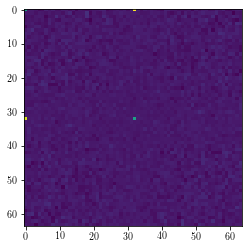

In [8]:
# Estimate Power spectrum
noiPMea=np.zeros((ngrid,ngrid)) # power
noi2Mea=np.zeros((ngrid,ngrid)) # power without conj
num=0
for i in range(4000):
    noi_image   =   galsim.ImageF(ngrid,ngrid,scale=scale)
    corNoise.applyTo(noi_image)
    noi_array=noi_image.array
    noiPMea+=np.abs(np.fft.fft2(noi_array))**2.
    noi2Mea+=(np.fft.fft2(noi_array)**2.).real
    num+=1
# make sure the <n(k)n(k)>=0
noiPMea=noiPMea/num
noi2Mea=noi2Mea/num
# Confirm that the power without conj average to 0
print(np.average(noiPMea))
print(np.average(noi2Mea))
plt.imshow(noi2Mea)

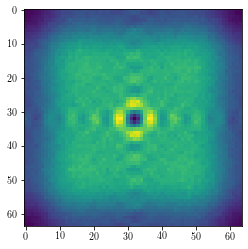

In [9]:
# but the power not
plt.imshow(np.fft.fftshift(noiPMea))

In [10]:
# std of residual on pf
resMea=np.zeros((ngrid,ngrid))
num=0
for i in range(4000):
    noi_image   =   galsim.ImageF(ngrid,ngrid,scale=scale)
    corNoise.applyTo(noi_image)
    noi_array=noi_image.array
    resMea+=(np.abs(np.fft.fft2(noi_array))**2.-noiPMea)**2.
    num+=1

In [11]:
resStd=resMea/num
resStd=np.sqrt(resStd)

13.849508234282162


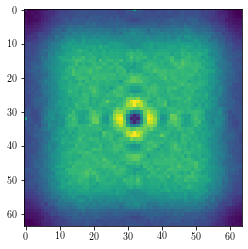

In [12]:
plt.imshow(fft.fftshift(resStd))
print(np.average(resStd))

0.0033399276729406224


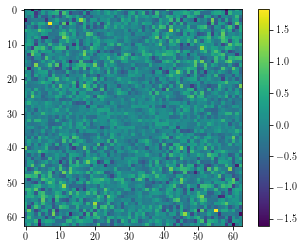

In [27]:
out=resStd-noiPMea
out[32,32]-=(np.sqrt(2.)-1)*noiPMea[0,0]
plt.imshow(out[1:,1:])
print(np.average(out))
plt.colorbar()